In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

In [21]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [22]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
cols = ['sepal length (cm)', 'petal width (cm)']
df_selected = df[cols].copy()

In [ ]:
np.random.seed(42)
n_missing = int(0.05 * df_selected.size)
missing_indices = (np.random.choice(df_selected.index, n_missing, replace=True),
                   np.random.choice(len(cols), n_missing, replace=True))

In [ ]:
df_selected.iloc[missing_indices] = np.nan
original_values = df[cols].copy()
filled_reg = df_selected.copy()

In [ ]:
for col in cols:
    known_data = filled_reg[filled_reg[col].notna()]
    missing_data = filled_reg[filled_reg[col].isna()]

    X_known = known_data.drop(columns=[col]).dropna()
    y_known = known_data[col].loc[X_known.index]
    X_missing = missing_data.drop(columns=[col]).dropna()

    if not X_known.empty and not X_missing.empty:
        model = LinearRegression()
        model.fit(X_known, y_known)
        filled_reg.loc[filled_reg[col].isna(), col] = model.predict(X_missing)

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
filled_knn = pd.DataFrame(knn_imputer.fit_transform(df_selected), columns=cols)

In [59]:
print("Original Data:\n")
df_selected.head(10)

Original Data:



,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
5,5.4,0.4
6,4.6,0.3
7,5.0,0.2
8,4.4,0.2
9,4.9,0.1


In [58]:
print("\nRegression Imputed Data:\n")
filled_reg.head(10)


Regression Imputed Data:



,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
5,5.4,0.4
6,4.6,0.3
7,5.0,0.2
8,4.4,0.2
9,4.9,0.1


In [57]:
print("\nKNN Imputed Data:\n")
filled_knn.head(10)


KNN Imputed Data:



,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
5,5.4,0.4
6,4.6,0.3
7,5.0,0.2
8,4.4,0.2
9,4.9,0.1


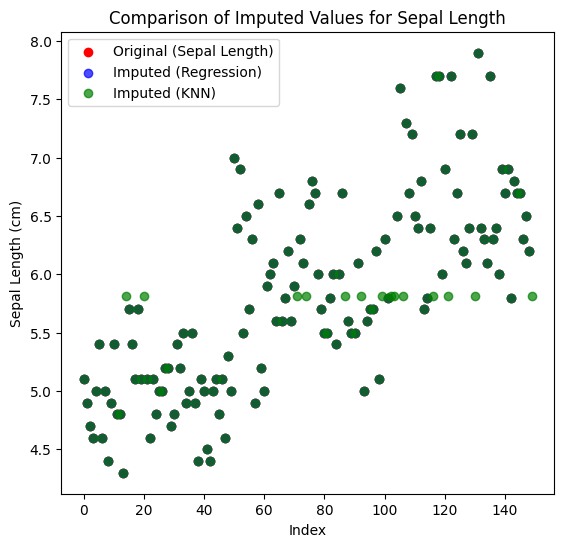

In [64]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_selected.index, df_selected['sepal length (cm)'], color='red', label='Original (Sepal Length)')
plt.scatter(df_selected.index, filled_reg['sepal length (cm)'], color='blue', label='Imputed (Regression)', alpha=0.7)
plt.scatter(df_selected.index, filled_knn['sepal length (cm)'], color='green', label='Imputed (KNN)', alpha=0.7)
plt.title('Comparison of Imputed Values for Sepal Length')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()

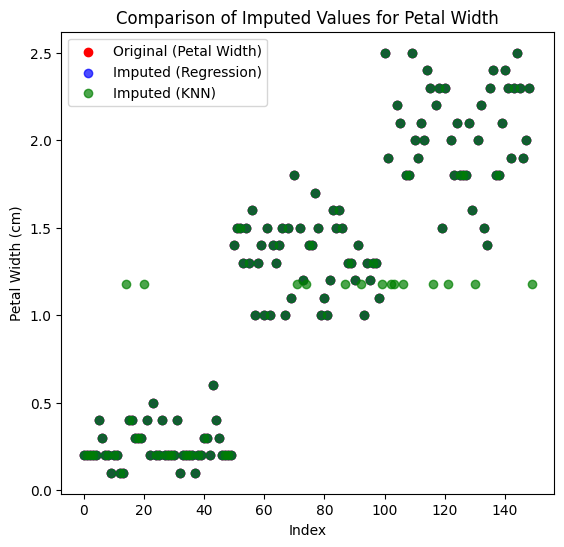

In [65]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
plt.scatter(df_selected.index, df_selected['petal width (cm)'], color='red', label='Original (Petal Width)')
plt.scatter(df_selected.index, filled_reg['petal width (cm)'], color='blue', label='Imputed (Regression)', alpha=0.7)
plt.scatter(df_selected.index, filled_knn['petal width (cm)'], color='green', label='Imputed (KNN)', alpha=0.7)
plt.title('Comparison of Imputed Values for Petal Width')
plt.xlabel('Index')
plt.ylabel('Petal Width (cm)')
plt.legend()